In [1]:
from math import sin, sqrt, exp, cos
import matplotlib.pyplot as plt
from case1_rk4 import rk_defect_control_static_alpha, rk_defect_control_perfect_first_step_smooth, rk_defect_control_perfect_first_step

In [2]:
def create_t_eval(start, end, num_points = 100):
    res = [start]
    h = (end - start)/(num_points - 1)

    for _ in range(num_points - 1):
        res.append(
            res[-1] + h
        )
    return res

In [3]:
def experiment(model, y0, t_span, solution):
    t_eval = create_t_eval(t_span[0], t_span[1])
    tol = 1e-6
    (res, sol, first_deriv, derivs) = rk_defect_control_perfect_first_step(model, t_span, y0[0], tol, solution)
    # (res, sol, first_deriv, derivs) = rk_defect_control_perfect_first_step_smooth(model, t_span, y0[0], tol, solution)
    # (res, sol, first_deriv, derivs) = rk_defect_control_static_alpha(model, t_span, y0[0], tol, solution)
    # print("derivs", derivs)
    print("integration complete")

    # ====================================== figure of rk6 vs rk6_interps vs rk45
    # plt.figure()
    xs = [x[0] for x in res]
    # ys = [x[1] for x in res]
    # plt.plot(xs, ys, label="rk6")

    # plots of where the end of the steps occured to look at the interp
    for this_x in xs:
        plt.axvline(x=this_x) 

    computed_solutions = [sol(x) for x in t_eval]
    plt.plot(t_eval, computed_solutions, label="rk6_interpolated")

    actual_solutions = solution(t_eval)
    plt.plot(t_eval, actual_solutions, label="solution")

    # removed rk45 plt.title("solution vs rk45 vs rk6 vs rk6_interpolated")
    plt.title("solution vs rk6_interpolated")
    plt.xlabel("t")
    plt.ylabel('y')
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end figure of rk6 vs rk6_interps vs rk45

    # ====================================== global error
    plt.figure()
    error = [(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(computed_solutions, actual_solutions)]
    for this_x in xs:
        plt.axvline(x=this_x) 
    plt.plot(t_eval, error, label="global error")
    plt.title("global error")
    plt.xlabel("t")
    plt.ylabel("error")
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end of global error

    # ====================================== figure of satisfying global defect
    actual_f_evals = [model(x, solution([x])[0])[0] for x in t_eval]
    hb_prime_evals = [first_deriv(x) for x in t_eval]
    plt.figure()
    plt.plot(t_eval, actual_f_evals)
    plt.plot(t_eval, hb_prime_evals)
    plt.title(f"first derivative for tol={tol}")
    plt.show()

    defects = [abs(actual_f_eval - hb_prime_eval) for (actual_f_eval, hb_prime_eval) in zip(actual_f_evals, hb_prime_evals)]
    plt.figure()
    plt.plot(t_eval, defects)
    plt.title(f"global defect for tol={tol}")
    plt.show()
    
    # ====================================== end figure of satisfying global defect

    # ====================================== figure of defect shape

    minimum_step_size = 0.01
    defects_small_steps = []
    plt.figure()
    for (x_i_minus_1, x_i, x_i_plus_1, hb) in derivs:
        num_points = 100
        pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
        defects = []
        for pt in pts_to_sample:
            y = solution([pt])[0]
            f_eval  = model(pt, y)[0]
            hb_prime_eval = hb.prime(pt)
            defects.append( abs(hb_prime_eval - f_eval) )
        maximum_defect = max(defects)
        # minimum_defect = min(defects)
        # plot_vals = [(defect - minimum_defect) / (maximum_defect - minimum_defect) for defect in defects]
        plot_vals = [ defect/ maximum_defect for defect in defects]
        #plt.plot(xs, defects, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
        x_axis = [i/(num_points - 1) for i in range(num_points)]

        if (x_i_plus_1 - x_i < minimum_step_size):
            defects_small_steps.append([x_axis, plot_vals])
            continue
        plt.plot(x_axis, plot_vals, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
    plt.title("plot of defects")
    plt.xlabel("x_i to x_i_plus_1")
    plt.ylabel('defect/(max_defect on x_i to x_i_plus_1)')
    # plt.legend()
    plt.show()
    # ====================================== end figure of defect

    # ====================================== defects on small steps
    plt.figure()
    for [x_axis, plot_vals] in defects_small_steps:
        plt.plot(x_axis, plot_vals)
    plt.title("plot of defects on small step sizes")
    plt.xlabel("x_i to x_i_plus_1")
    plt.ylabel('defect/(max_defect on x_i to x_i_plus_1)')
    plt.show()

    # ========================================================= end of steps error vs interpolant error
    for (x, y) in res:
        print(abs(y - solution([ x ])[0]))

tolerance= 1e-06
alpha values [0.5, 1.0, 0.9999999999999997, 1.0000000000000002, 1.0000000000000007, 0.49999999999999967]
n_steps 29
n_successful_steps 29

integration complete


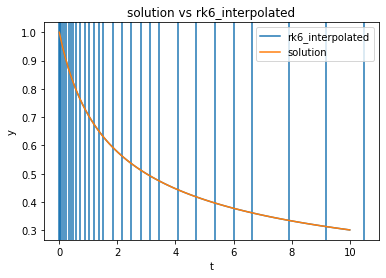

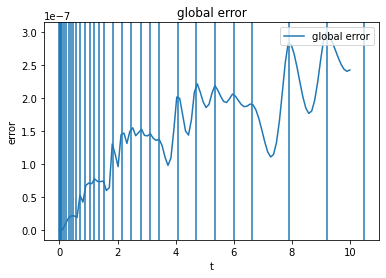

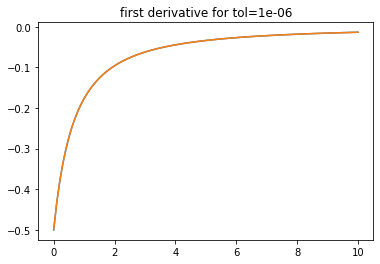

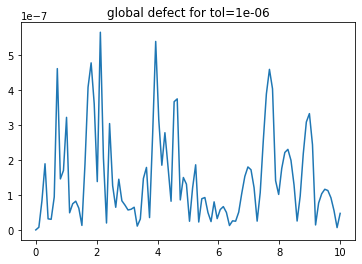

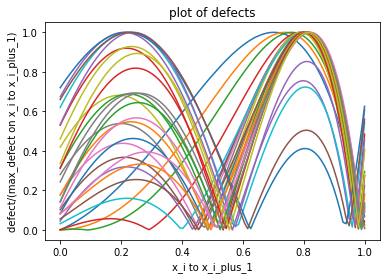

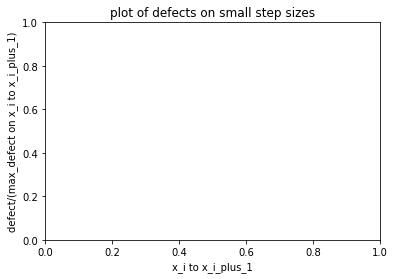

0.0
0.0
5.789813073420191e-13
1.739530741673434e-11
4.622953131416807e-10
1.0273384365433458e-08
1.611048250360625e-08
1.9489146629858567e-08
2.1322855037197996e-08
2.2175652314437855e-08
2.2402967148060782e-08
5.5726222858432095e-08
7.105029031784227e-08
7.705364402088577e-08
7.815413038958496e-08
7.668401513782896e-08
7.390840839338608e-08
1.3523879660581883e-07
1.562240045105412e-07
1.5931525898515986e-07
1.544850307677592e-07
1.4635228395842859e-07
1.3710874696704067e-07
2.0709136300256503e-07
2.2332539900693504e-07
2.1848374942567972e-07
2.0575293802060912e-07
1.9065881023960785e-07
2.855053241601624e-07
2.992972894522161e-07
2.8535239338101093e-07


In [4]:
t_span_1 = [0, 10]
y0_1 = [1]

def model1(t, y):
    return [(-1/2) * y**3]

def solution1(t):
    return [1/sqrt(1+x) for x in t]

experiment(model1, y0_1, t_span_1, solution1)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.9999999999999997, 1.0000000000000002, 1.0000000000000007, 0.9999999999999987, 0.5000000000000007, 1.9999999999999973]
n_steps 87
n_successful_steps 72

integration complete


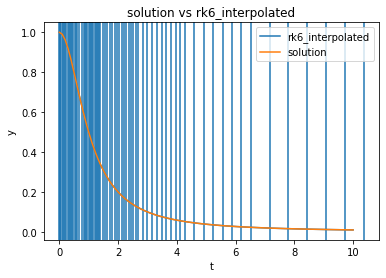

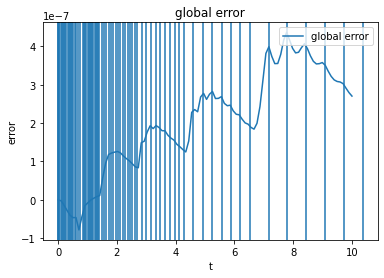

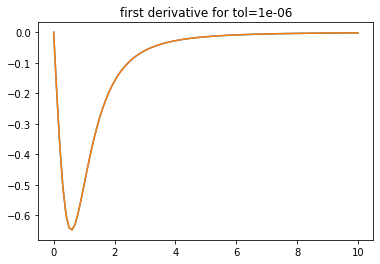

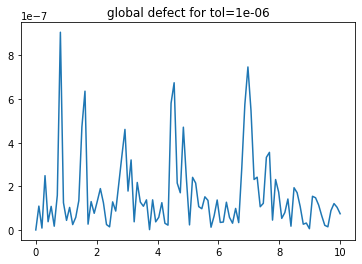

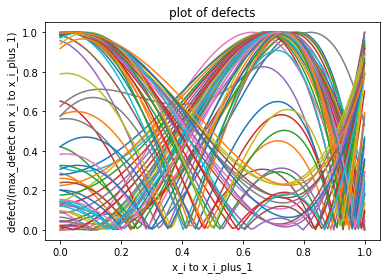

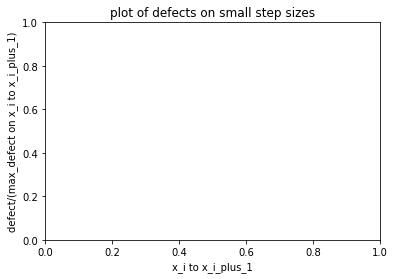

0.0
0.0
4.670708264598034e-13
3.032218920395735e-11
1.931740434280016e-09
5.099429878363537e-09
9.33999555474685e-09
1.4387250391045825e-08
1.9924496275081083e-08
2.5611346154974513e-08
3.111194168958775e-08
3.612120369478333e-08
4.038613932166868e-08
4.37201516101382e-08
4.6009501875055037e-08
4.721227875315037e-08
4.73511910792368e-08
4.6502062200914906e-08
8.294620235105299e-08
6.790707740567115e-08
2.1062008470629223e-08
1.7677037278396313e-08
1.431344931468459e-08
1.1048490455856097e-08
7.94133042658629e-09
5.034719252616782e-09
2.3570697615937775e-09
7.52938822401461e-11
2.255907127768353e-09
4.1860788169145735e-09
5.873020736402168e-09
7.328229467695735e-09
8.566127196463214e-09
9.602951933640469e-09
1.045587466608211e-08
5.3325204196763565e-08
8.387400285414515e-08
1.0467138783498697e-07
1.179056369760012e-07
1.2538276020213068e-07
1.2855849848558698e-07
1.2858473547039395e-07
1.2635915672132292e-07
1.2257217732458692e-07
1.1774838412637045e-07
1.12281616337917e-07
1.0646382303

In [5]:
t_span_2 = [0, 10]
y0_2 = [1]

def model2(t, y):
    return [-2*t*y**2]

def solution2(t):
    return [1/(1+x**2) for x in t]

experiment(model2, y0_2, t_span_2, solution2)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.9999999999999997, 1.0000000000000002, 1.0000000000000007, 0.9999999999999987, 0.5000000000000007]
n_steps 34
n_successful_steps 32

integration complete


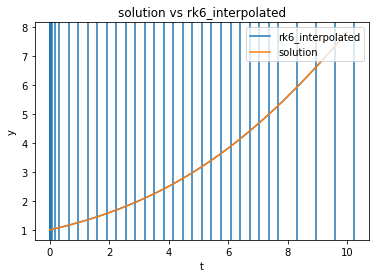

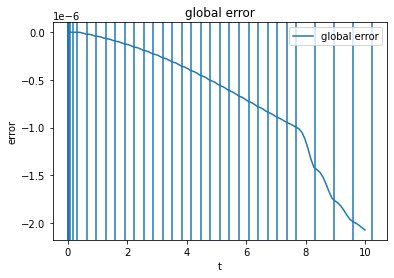

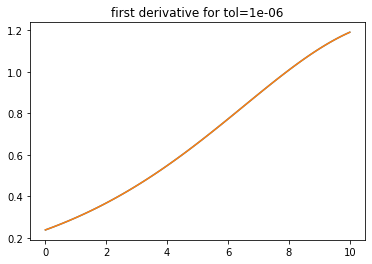

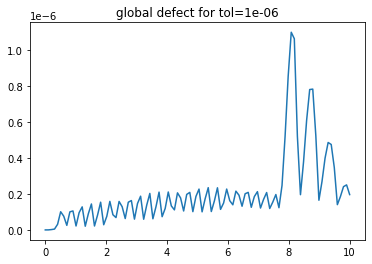

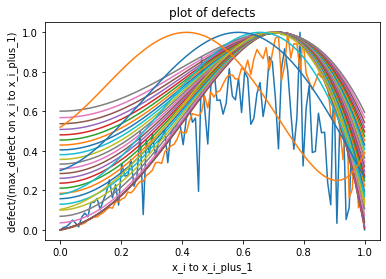

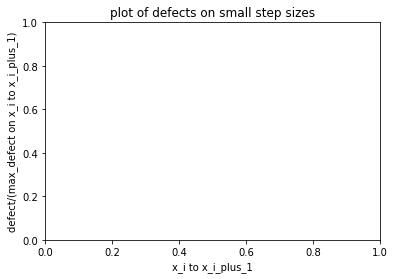

0.0
0.0
4.440892098500626e-16
1.865174681370263e-14
6.02629057766535e-13
1.9390711258893134e-11
6.276053010623173e-10
2.0525320776343392e-08
4.272694309470637e-08
6.733763524557901e-08
9.444910586964284e-08
1.241361398118812e-07
1.5645292128496635e-07
1.9142921825476833e-07
2.290665166437833e-07
2.693342189274972e-07
3.121660356875111e-07
3.5745672599674094e-07
4.050593411797365e-07
4.547831600199004e-07
5.063924715109636e-07
5.596063856749822e-07
6.140998047854396e-07
6.695056793404319e-07
7.254186082938929e-07
7.813998132988331e-07
8.369834247901053e-07
8.916840013029059e-07
9.450050724169046e-07
9.964485281344082e-07
1.4311771199260193e-06
1.7653233435055427e-06
1.988168430777648e-06
2.0996004685969183e-06


In [6]:
t_span_3 = [0, 10]
y0_3 = [1]

def model3(t, y):
    return [(1/4)*y*(1 - y/20)]

def solution3(t):
    return [20 / ( 1 + 19 * exp(-x/4) ) for x in t]

experiment(model3, y0_3, t_span_3, solution3)

tolerance= 1e-06
alpha values [0.5000000000000007, 1.0, 2.0000000000000004, 3.999999999999999, 0.9999999999999987, 1.0000000000000029, 0.9999999999999972, 0.5, 8.000000000000004, 2.0, 1.000000000000011, 1.0000000000000444, 1.9999999999996447, 1.0000000000003553, 2.0000000000007105, 15.999999999999986, 0.9999999999999556, 1.0000000000000222, 0.5000000000000888, 0.9999999999999889, 0.9999999999998224, 0.49999999999982236]
n_steps 4105
n_successful_steps 3877

integration complete


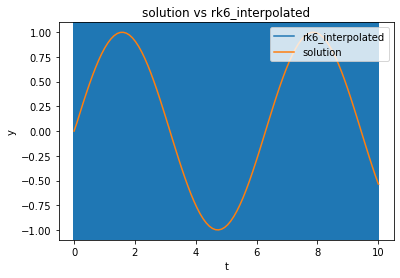

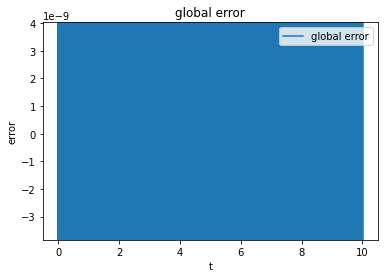

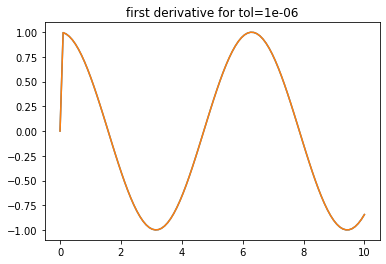

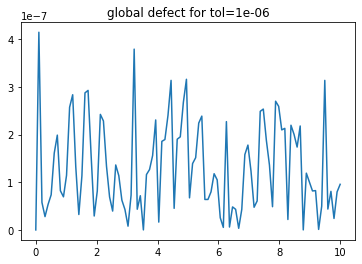

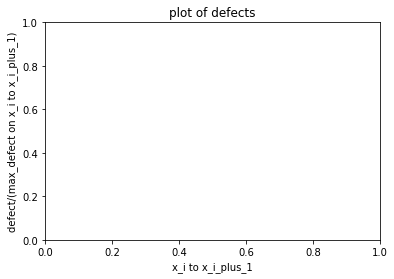

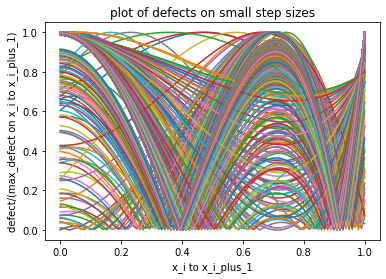

0.0
0.0
2.8931496955098002e-11
5.4356795106680345e-11
7.659452933017619e-11
9.593758946990771e-11
1.1265507884189452e-10
7.697371811124509e-10
1.2708079536599692e-09
1.6434553492400417e-09
1.910938024138331e-09
2.0928218463778236e-09
2.2055266033632615e-09
2.262795180396626e-09
2.2760959644818612e-09
2.254967598064317e-09
2.207314157842699e-09
2.1396575691778885e-09
2.057353308548837e-09
1.964774447305029e-09
1.8654686094465855e-09
1.762291590434728e-09
1.6575208705571498e-09
1.552952235556182e-09
1.4499814023072322e-09
1.3496733140827555e-09
1.2528205903250544e-09
1.1599927997318904e-09
1.0715779756587107e-09
9.878173626298725e-10
1.931636441077078e-09
2.4025588393761232e-09
2.5632089784011214e-09
2.5274053475077274e-09
2.3737951188040896e-09
2.155844648632499e-09
1.909131353006188e-09
1.656641546166071e-09
1.4125999675540513e-09
1.1852211712071181e-09
2.370071985891009e-09
1.7950338437877633e-09
6.155864012979961e-10
6.494912108134798e-10
1.7960077591805401e-09
2.767140461212847e-09


In [7]:
t_span_4 = [0, 10]
y0_4 = [0]

def model4(t, y):
    return [100 * (sin(t) - y)]
    # return [10 * (sin(t) - y)]

def solution4(t):
    return [( 100 * ( exp(-100 * x) - cos(x) ) +  10000 * sin(x) ) / 10001 for x in t]
    # return [( 10 * ( exp(-10 * x) - cos(x) ) +  100 * sin(x) ) / 101 for x in t]

experiment(model4, y0_4, t_span_4, solution4)

tolerance= 1e-06
alpha values [0.9999999999999997, 1.0, 0.9999999999999987, 1.0000000000000002, 1.0000000000000007, 0.5000000000000007, 1.9999999999999973, 2.0, 0.5, 1.000000000000011, 2.0000000000000444, 1.0000000000000444, 1.9999999999996447, 0.9999999999999556, 1.0000000000000222, 0.5000000000000888, 0.9999999999999889, 0.4999999999999889, 0.9999999999998224]
n_steps 1289
n_successful_steps 1254

integration complete


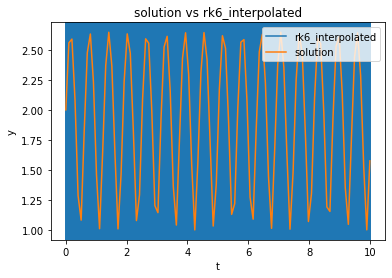

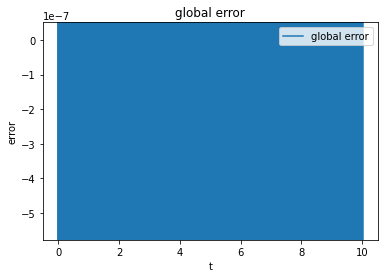

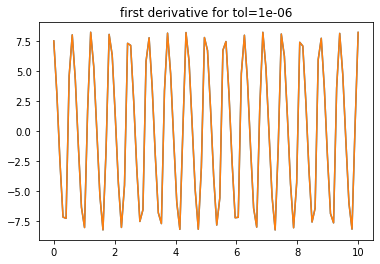

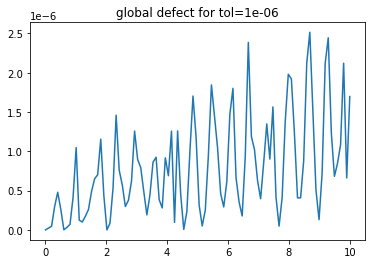

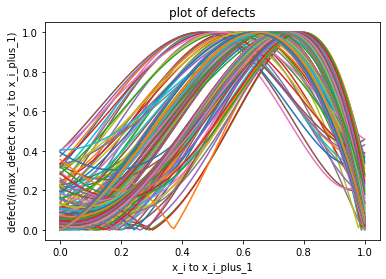

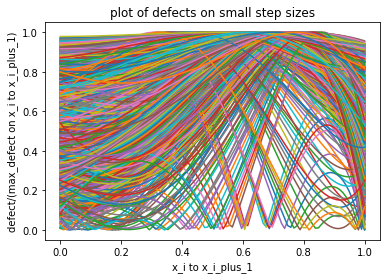

0.0
0.0
2.8572144650240716e-09
5.730221186439621e-09
8.56105453195255e-09
1.1298477708976407e-08
1.3898743489448862e-08
1.632529000872296e-08
1.8548007130192445e-08
2.054237580040308e-08
2.228864248721152e-08
2.3771085988499863e-08
2.4977404589066055e-08
2.589822134524411e-08
2.6526698171380758e-08
2.6858249846384297e-08
2.1607309275140096e-08
2.102127361069961e-08
2.0128702260535647e-08
1.8934547263427248e-08
1.7445849209707376e-08
1.5671987263488063e-08
1.3625018002727529e-08
1.1320101300782426e-08
8.77602435167546e-09
6.0157976378150124e-09
3.067287313029965e-09
3.6212366438803656e-11
3.255680613989398e-09
6.546737818524662e-09
9.861429894897356e-09
1.3152817723849353e-08
1.6384814838232842e-08
1.9551582797205924e-08
2.2713735781110245e-08
2.6063064151315984e-08
3.003312332161556e-08
3.547735460962542e-08
3.6643449830009445e-08
3.791401770314451e-08
3.930972658494625e-08
4.085515592500144e-08
4.257850272360031e-08
4.451048152276371e-08
4.668197917112593e-08
4.9119973866140754e-08
5.

In [8]:
t_span_5 = [0, 10]
y0_5 = [2]

def model5(t, y):
    return [(15 * cos(10 * t))/y]

def solution5(t):
    return [sqrt(3*sin(10*x) + 4) for x in t]

experiment(model5, y0_5, t_span_5, solution5)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.9999999999999997, 1.0000000000000002, 1.0000000000000007, 0.49999999999999967]
n_steps 30
n_successful_steps 30

integration complete


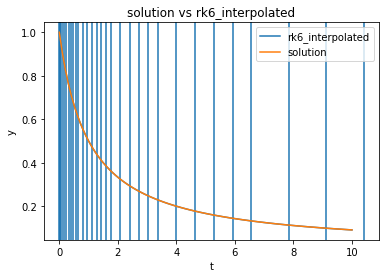

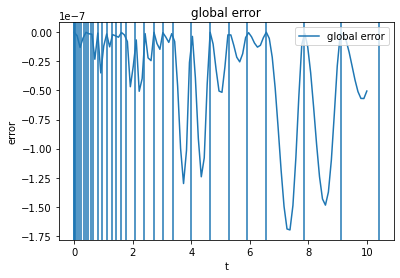

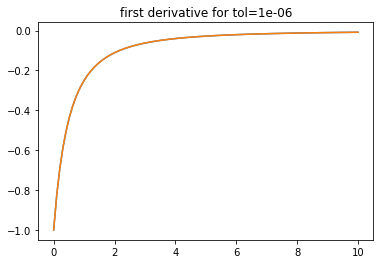

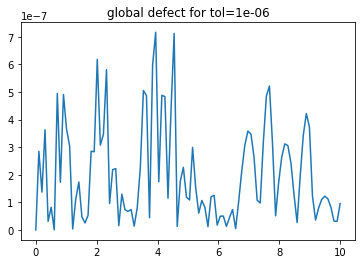

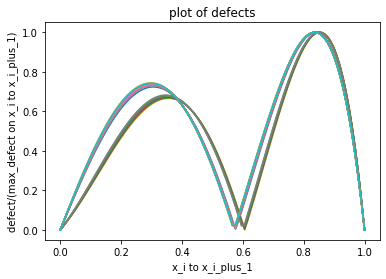

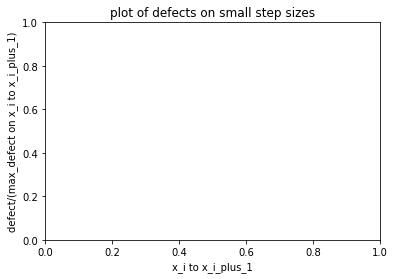

0.0
0.0
0.0
0.0
0.0
1.1102230246251565e-16
1.1102230246251565e-16
0.0
0.0
0.0
0.0
0.0
0.0
0.0
5.551115123125783e-17
5.551115123125783e-17
0.0
5.551115123125783e-17
5.551115123125783e-17
5.551115123125783e-17
5.551115123125783e-17
5.551115123125783e-17
8.326672684688674e-17
8.326672684688674e-17
8.326672684688674e-17
8.326672684688674e-17
8.326672684688674e-17
8.326672684688674e-17
8.326672684688674e-17
6.938893903907228e-17
6.938893903907228e-17
6.938893903907228e-17


In [9]:
t_span_6 = [0, 10]
y0_6 = [1]

def model6(t, y):
    return [-y/(t+1)]

def solution6(t):
    return [1/(x+1) for x in t]

experiment(model6, y0_6, t_span_6, solution6)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.9999999999999997, 1.0000000000000002, 1.0000000000000007, 0.9999999999999987, 0.5000000000000007, 1.9999999999999973, 2.0, 1.0000000000000056, 0.9999999999999944]
n_steps 69
n_successful_steps 60

integration complete


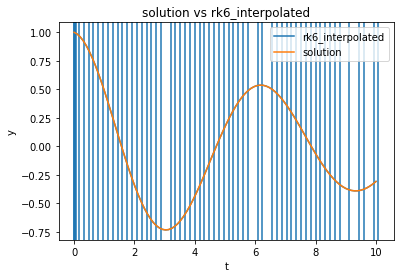

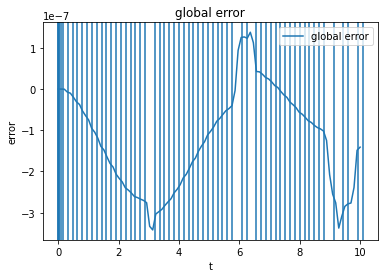

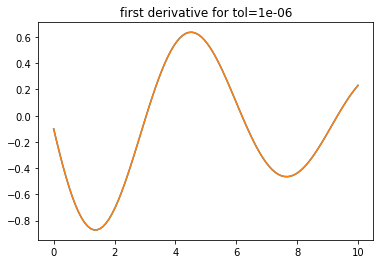

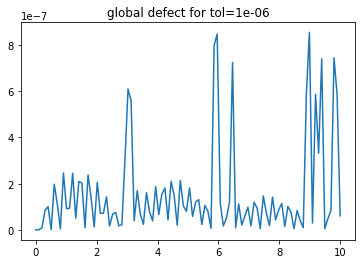

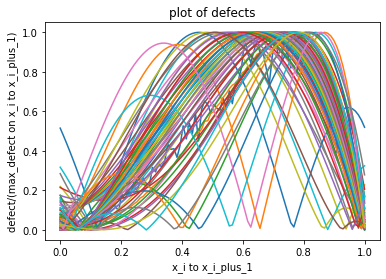

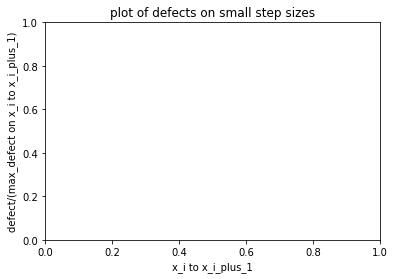

0.0
0.0
1.6653345369377348e-15
6.661338147750939e-14
2.983280289470258e-12
1.4896517352980254e-10
8.057614908629773e-09
1.989940956459435e-08
3.5180164892345545e-08
5.3335043603830457e-08
7.374510524460476e-08
9.57547089397437e-08
1.186893002769196e-07
1.4187311821178827e-07
1.646463758525618e-07
1.8638149404393012e-07
2.0649800680505592e-07
2.2447580083628793e-07
2.398664060154765e-07
2.523021118694402e-07
2.6150274556879793e-07
2.672800145653298e-07
2.6953937981577525e-07
3.0283965124500156e-07
2.9427015957317337e-07
2.827064207178154e-07
2.684695674659565e-07
2.5193955488500563e-07
2.3354364281358286e-07
2.1374404096663469e-07
1.9302505505081058e-07
1.7188007786494985e-07
1.5079875884116412e-07
1.3025467345689767e-07
1.1069378910710803e-07
9.2523995548488e-08
7.610593233398077e-08
6.174530475799855e-08
4.968683747774705e-08
4.010996640380071e-08
1.23691354603217e-07
1.2300653351449142e-07
4.2660622423529304e-08
3.6161451555383195e-08
2.7763899235200284e-08
1.775978869522632e-08
6.47

In [10]:
t_span_7 = [0, 10]
y0_7 = [1]

def model7(t, y):
    alpha = 0.1
    return [ -alpha*y - exp(-alpha*t)*sin(t)]

def solution7(t):
    alpha = 0.1
    return [exp(-alpha*x)*cos(x) for x in t]

experiment(model7, y0_7, t_span_7, solution7)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.49999999999999983, 1.0000000000000002, 0.9999999999999997, 0.5000000000000002, 1.0000000000000007, 0.49999999999999967, 0.9999999999999987, 1.0000000000000029, 0.5000000000000007, 0.9999999999999972]
n_steps 99
n_successful_steps 83

integration complete


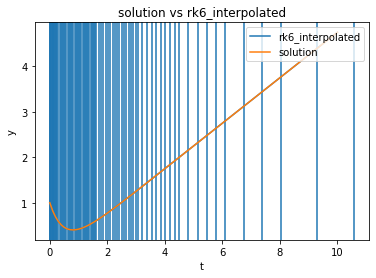

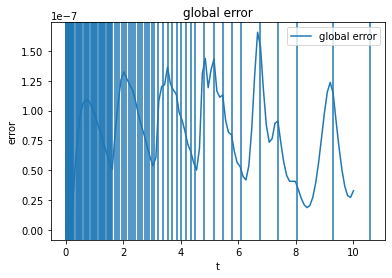

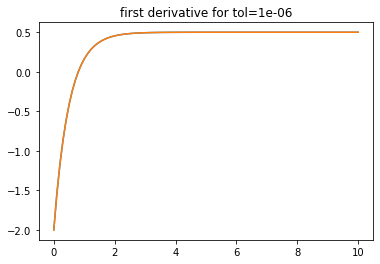

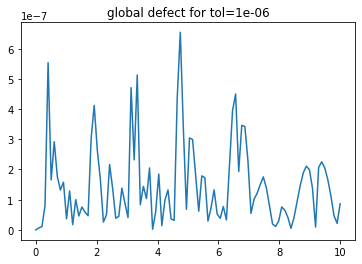

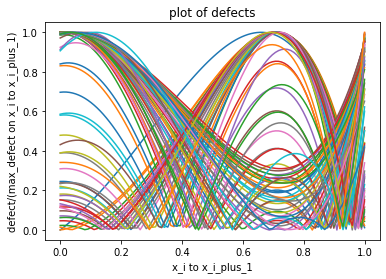

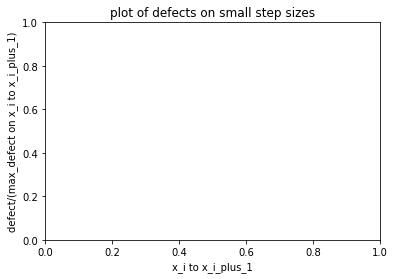

0.0
0.0
3.2564728691397704e-11
1.049336506575571e-09
1.9863217737281502e-09
2.848214220030343e-09
3.639462287097217e-09
4.36428082561946e-09
5.0266627527051355e-09
5.630389821043025e-09
6.179043832155173e-09
6.6760149630695764e-09
7.1245130905950305e-09
2.8270073060276957e-08
4.612202397780152e-08
6.106182204312915e-08
7.343173613616472e-08
8.353862018806169e-08
9.165733422245026e-08
9.803385109252716e-08
1.0288807306135794e-07
1.0641638725772395e-07
1.0879398110175131e-07
1.1017694157011704e-07
1.1070415645297871e-07
1.1049903664295257e-07
1.0967107488824013e-07
1.0831725633098088e-07
1.0652333476413034e-07
1.0436498609767142e-07
1.019088514131461e-07
9.921347859931373e-08
9.633017311605485e-08
9.330376549154806e-08
9.017330360183706e-08
8.697267694923738e-08
8.373117910132066e-08
8.047401389710274e-08
7.722275124910638e-08
7.399573692667971e-08
7.08084608724846e-08
6.767388782691341e-08
6.460275392417003e-08
6.160383336784037e-08
5.868417574106388e-08
5.584931972446583e-08
5.31034842

In [11]:
t_span_11 = [0, 10]
y0_11 = [1]

def model11(t, y):
    return [-2*y + t]

def solution11(t):
    return [1/4 * (-1 + 5 * exp(-2 * x) + 2 * x) for x in t]

experiment(model11, y0_11, t_span_11, solution11)

In [12]:
# THE PROBLEMS BELOW CANNOT BE DONE YET
# CANNOT BE DONE AS MY CURRENT rk6 does not handle a vector for the ys
### ======================================================================


# Jeff cash test set first one

t_span_8 = [0, 10]
eps = 0.1
a = exp(-1/eps)
y0_8 = [1, a/(eps*(-1+a))]

def model8(t, y):
    return [y[1], y[0]/eps]

def solution8(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [(1-exp(x/eps)*a)/(1-a) for x in t]

experiment(model8, y0_8, t_span_8, solution8)

## the results were extremely bad. So i wanted to see the solution
plt.figure()
plt.plot(t_span_8, solution8(t_span_8))



TypeError: 'int' object is not subscriptable

In [ ]:
# Jeff cash test set second one
t_span_9 = [0, 10]
eps = 0.1
y0_9 = [1, -1/sqrt(eps)]

def model9(t, y):
    return [y[1], (y[0] + y[0]**2 - exp(-2*t/sqrt(eps)))/eps]

def solution9(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [exp(-x/sqrt(eps)) for x in t]

experiment(model9, y0_9, t_span_9, solution9)

In [ ]:
# Wolfram Alpha first problem

t_span_10 = [0, 10]
y0_10 = [1, 2]

def model10(t, y):
    return [y[1], -3*y[0] + 2*cos(4*t)]

def solution10(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    s = sqrt(3)
    return [(26*s*sin(s*x) - 6*cos(4*x) + 45*cos(s*x))/39 for x in t]

experiment(model10, y0_10, t_span_10, solution10)